# **X-ray and MWL spectral analysis using GammapyXray**

In [2]:
import gammapy
gammapy.__version__

'0.20.1'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import naima
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from copy import deepcopy

In [5]:
from gammapy.modeling import Fit, Parameter
from gammapy.modeling.models import SkyModel, NaimaSpectralModel, Models, PowerLawSpectralModel, PowerLaw2SpectralModel
from gammapy.datasets import Datasets, FluxPointsDataset
from gammapy.maps import MapAxis
from gammapy.catalog import SourceCatalogHGPS
from gammapy.estimators import FluxPoints

In [6]:
from gammapyXray import *

In [7]:
from sherpa.astro.xspec import XSTBabs, XSphabs, XSvapec, XSgaussian, XSpowerlaw, XSconstant

In [8]:
import sherpa.astro.ui as ui
ui.get_xsabund()

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


'wilm'

In [77]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

----------------------------------------------------------------------

# **Sherpa analysis**

In [9]:
filename = "../PWNforLuca/PWNannuPN/PWNannu-srcspecPN.pi"
ui.load_pha(1, filename)

read ARF file ../PWNforLuca/PWNannuPN/PWNannuPN.arf
read RMF file ../0605960101PN.rmf
read ARF (background) file ../PWNforLuca/PWNannuPN/PWNannuPN.arf
read RMF (background) file ../0605960101PN.rmf
read background file ../PWNforLuca/PWNannuPN/srcbkgrnd_EFM_PN.pi


In [10]:
filename = "../PWNforLuca/PWNannuM1/PWNannu-srcspecM1.pi"
ui.load_pha(2, filename)

read ARF file ../PWNforLuca/PWNannuM1/PWNannuM1.arf
read RMF file ../0605960101M1.rmf
read ARF (background) file ../PWNforLuca/PWNannuM1/PWNannuM1.arf
read RMF (background) file ../0605960101M1.rmf
read background file ../PWNforLuca/PWNannuM1/srcbkgrnd_FFM_M1.pi


In [11]:
filename = "../PWNforLuca/PWNannuM2/PWNannu-srcspecM2.pi"
ui.load_pha(3, filename)

read ARF file ../PWNforLuca/PWNannuM2/PWNannuM2.arf
read RMF file ../0605960101M2.rmf
read ARF (background) file ../PWNforLuca/PWNannuM2/PWNannuM2.arf
read RMF (background) file ../0605960101M2.rmf
read background file ../PWNforLuca/PWNannuM2/srcbkgrnd_FFM_M2.pi


In [12]:
ui.notice_id(ids=1, lo=1, hi=10, )
ui.notice_id(ids=[2, 3], lo=1, hi=10)

In [13]:
ui.set_stat("wstat")

In [14]:
ui.set_source(
    id=1,
    model=ui.xstbabs.absorption_source * ui.xspowerlaw.pl_source + \
    ui.xsphabs.absorption_lowendiff * (ui.xsgaussian.gaussian_lowendiff + ui.xsvapec.vapec_lowendiff) +\
    ui.xsphabs.absorption_astrodiff * ui.xspowerlaw.pl_astrodiff
)

ui.set_source(
    id=2,
    model=absorption_source * pl_source + \
    absorption_lowendiff * (gaussian_lowendiff + vapec_lowendiff) +\
    absorption_astrodiff * pl_astrodiff
)

ui.set_source(
    id=3,
    model=absorption_source * pl_source + \
    absorption_lowendiff * (gaussian_lowendiff + vapec_lowendiff) +\
    absorption_astrodiff * pl_astrodiff
)

pl_source.norm = 3.4e-4
pl_source.norm.min = 1e-5
pl_source.norm.max = 1e-3
pl_source.PhoIndex = 2
pl_source.PhoIndex.min = 1
pl_source.PhoIndex.max = 3

absorption_source.nH = 0.64
absorption_source.nH.min = 0.1
absorption_source.nH.max = 2

pl_astrodiff.norm =  2.66673e-04
pl_astrodiff.PhoIndex = 1.89483
pl_astrodiff.norm.frozen = True
pl_astrodiff.PhoIndex.frozen = True

absorption_astrodiff.nH = 0.500802
absorption_astrodiff.nH.frozen = True

gaussian_lowendiff.lineE = 0.72
gaussian_lowendiff.Sigma = 3.37842e-14
gaussian_lowendiff.norm = 2.77268e-05
gaussian_lowendiff.lineE.frozen = True
gaussian_lowendiff.Sigma.frozen = True
gaussian_lowendiff.norm.frozen = True

vapec_lowendiff.kT = 0.140044 
vapec_lowendiff.kT.frozen = True
vapec_lowendiff.norm = 9.90426e-03
vapec_lowendiff.norm.frozen = True
vapec_lowendiff.He = 0.999959
vapec_lowendiff.C = 2.40751
vapec_lowendiff.N = 1.48867e-02
vapec_lowendiff.O = 0.457789
vapec_lowendiff.Ne = 1.03841
vapec_lowendiff.Fe = 2.13706

absorption_lowendiff.nH = 5e-2
absorption_lowendiff.nH.frozen = True

In [15]:
ui.get_model()

<RSPModelPHA model instance 'apply_rmf(apply_arf((23803.2149954461 * (((xstbabs.absorption_source * xspowerlaw.pl_source) + (xsphabs.absorption_lowendiff * (xsgaussian.gaussian_lowendiff + xsvapec.vapec_lowendiff))) + (xsphabs.absorption_astrodiff * xspowerlaw.pl_astrodiff)))))'>

Reading APEC data from 3.0.9



tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.


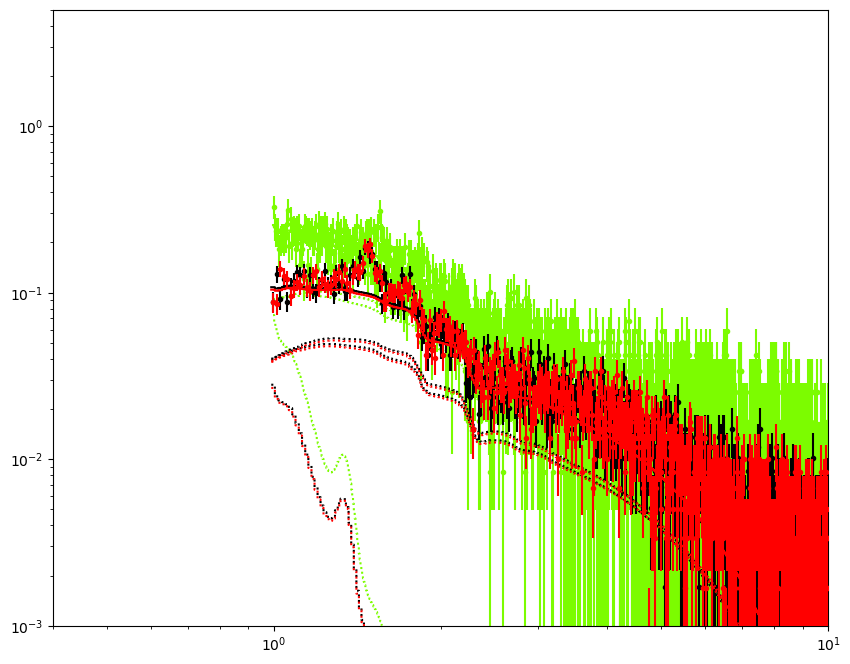

In [16]:
ids = [1, 2, 3]
colors = ["lawngreen", "k", "r"]
model_components = [
    absorption_source * pl_source,
    absorption_lowendiff * (gaussian_lowendiff + vapec_lowendiff),
    absorption_astrodiff * pl_astrodiff
]

plt.figure(figsize=(10, 8))
for id, color in zip(ids, colors):
    ui.plot_data(id, color=color, overplot=True)
    ui.plot_model(id, color=color, overplot=True)
    for model in model_components:
        ui.plot_model_component(id, model=model, linestyle=":", color=color, overplot=True)

plt.ylim(1e-3, 5)
plt.xlim(0.4, 10)
plt.yscale("log")
plt.xscale("log")

In [17]:
ui.guess(pl_source)

In [18]:
ui.fit()
result_sherpa = ui.get_fit_results()

Datasets              = 1, 2, 3
Method                = levmar
Statistic             = wstat
Initial fit statistic = 4.44665e+06
Final fit statistic   = 3401.15 at function evaluation 21
Data points           = 3007
Degrees of freedom    = 3004
Probability [Q-value] = 4.2745e-07
Reduced statistic     = 1.13221
Change in statistic   = 4.44325e+06
   absorption_source.nH   0.67259      +/- 0.0731808   
   pl_source.PhoIndex   2.00932      +/- 0.065286    
   pl_source.norm   0.000346054  +/- 2.74855e-05 


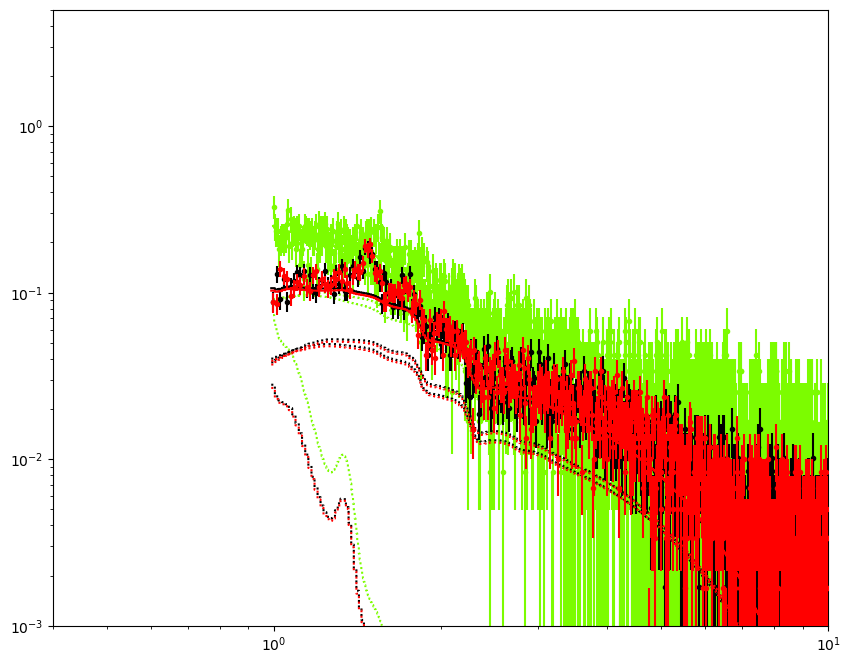

In [19]:
ids = [1, 2, 3]
colors = ["lawngreen", "k", "r"]
model_components = [
    absorption_source * pl_source,
    absorption_lowendiff * (gaussian_lowendiff + vapec_lowendiff),
    absorption_astrodiff * pl_astrodiff
]

plt.figure(figsize=(10, 8))
for id, color in zip(ids, colors):
    ui.plot_data(id, color=color, overplot=True)
    ui.plot_model(id, color=color, overplot=True)
    for model in model_components:
        ui.plot_model_component(id, model=model, linestyle=":", color=color, overplot=True)

plt.ylim(1e-3, 5)
plt.xlim(0.4, 10)
plt.yscale("log")
plt.xscale("log")

-------------------------------

# **GammapyXray analysis**

# Part 1

Repeat the same fit performed with Sherpa

### Load and inspect the X-ray data

In [20]:
filename = "../PWNforLuca/PWNannuPN/PWNannu-srcspecPN.pi"
pn_dataset = StandardOGIPDataset.read(filename)
filename = "../PWNforLuca/PWNannuM1/PWNannu-srcspecM1.pi"
mos1_dataset = StandardOGIPDataset.read(filename)
filename = "../PWNforLuca/PWNannuM2/PWNannu-srcspecM2.pi"
mos2_dataset = StandardOGIPDataset.read(filename)

In [21]:
xmm_datasets = Datasets(datasets=[pn_dataset, mos1_dataset, mos2_dataset])

In [22]:
pn_dataset.grouped.geoms["geom_exposure"].axes["energy_true"].edges

<Quantity [ 0.061     ,  0.062     ,  0.063     ,  0.064     ,  0.065     ,
            0.066     ,  0.067     ,  0.068     ,  0.069     ,  0.07      ,
            0.071     ,  0.072     ,  0.073     ,  0.074     ,  0.075     ,
            0.076     ,  0.077     ,  0.078     ,  0.079     ,  0.08      ,
            0.081     ,  0.082     ,  0.083     ,  0.084     ,  0.085     ,
            0.086     ,  0.087     ,  0.088     ,  0.089     ,  0.09      ,
            0.091     ,  0.092     ,  0.093     ,  0.094     ,  0.095     ,
            0.096     ,  0.097     ,  0.098     ,  0.099     ,  0.1       ,
            0.101     ,  0.102     ,  0.103     ,  0.104     ,  0.105     ,
            0.106     ,  0.107     ,  0.108     ,  0.109     ,  0.11      ,
            0.111     ,  0.112     ,  0.113     ,  0.114     ,  0.115     ,
            0.116     ,  0.117     ,  0.118     ,  0.119     ,  0.12      ,
            0.121     ,  0.122     ,  0.123     ,  0.124     ,  0.125     ,
            

Restrict the fit range for each instrument:

In [23]:
pn_dataset.mask_fit = pn_dataset._geom.energy_mask(1*u.keV, 10*u.keV)
mos1_dataset.mask_fit = mos1_dataset._geom.energy_mask(1*u.keV, 10*u.keV)
mos2_dataset.mask_fit = mos2_dataset._geom.energy_mask(1*u.keV, 10*u.keV)

Define a spectral model

In [24]:
# PWN
pl_source = XSpowerlaw()
absorption_source = XSTBabs()

# Astro diff
pl_astrodiff = XSpowerlaw()
absorption_astrodiff = XSphabs()

# Low energy diff / thermal
gaussian_lowendiff = XSgaussian()
vapec_lowendiff = XSvapec()
absorption_lowendiff = XSphabs()

pl_source.norm = 3.4e-4
pl_source.norm.min = 1e-5
pl_source.norm.max = 1e-3
pl_source.PhoIndex = 2
pl_source.PhoIndex.min = 1
pl_source.PhoIndex.max = 3

absorption_source.nH = 0.64
absorption_source.nH.min = 0.1
absorption_source.nH.max = 2

pl_astrodiff.norm =  2.66673e-04
pl_astrodiff.PhoIndex = 1.89483
pl_astrodiff.norm.frozen = True
pl_astrodiff.PhoIndex.frozen = True

absorption_astrodiff.nH = 0.500802
absorption_astrodiff.nH.frozen = True

gaussian_lowendiff.lineE = 0.72
gaussian_lowendiff.Sigma = 3.37842e-14
gaussian_lowendiff.norm = 2.77268e-05
gaussian_lowendiff.lineE.frozen = True
gaussian_lowendiff.Sigma.frozen = True
gaussian_lowendiff.norm.frozen = True

vapec_lowendiff.kT = 0.140044 
vapec_lowendiff.kT.frozen = True
vapec_lowendiff.norm = 9.90426e-03
vapec_lowendiff.norm.frozen = True
vapec_lowendiff.He = 0.999959
vapec_lowendiff.C = 2.40751
vapec_lowendiff.N = 1.48867e-02
vapec_lowendiff.O = 0.457789
vapec_lowendiff.Ne = 1.03841
vapec_lowendiff.Fe = 2.13706

absorption_lowendiff.nH = 5e-2
absorption_lowendiff.nH.frozen = True

In [25]:
# PWN
pl_source_gp = SherpaSpectralModel(pl_source) 
absorption_source_gp = SherpaSpectralModel(absorption_source, integrated=False, default_units=(u.keV, 1))

source = pl_source_gp * absorption_source_gp

# Astro diff
pl_astrodiff_gp = SherpaSpectralModel(pl_astrodiff)
absorption_astrodiff_gp = SherpaSpectralModel(absorption_astrodiff, integrated=False, default_units=(u.keV, 1))

astrodiff = absorption_astrodiff_gp * pl_astrodiff_gp

# Low en diff / Thermal
gaussian_lowendiff_gp = SherpaSpectralModel(gaussian_lowendiff)
vapec_lowendiff_gp = SherpaSpectralModel(vapec_lowendiff)
absorption_lowendiff_gp = SherpaSpectralModel(absorption_lowendiff, integrated=False, default_units=(u.keV, 1))

lowendiff = absorption_lowendiff_gp * (gaussian_lowendiff_gp + vapec_lowendiff_gp)

In [26]:
names = [
        xmm_datasets[0].grouped.name, 
        xmm_datasets[1].grouped.name,
        xmm_datasets[2].grouped.name, 
]
source_skymodel = SkyModel(spectral_model=source, name="source", datasets_names=names)
lowendiff_skymodel = SkyModel(spectral_model=lowendiff, name="lowendiff", datasets_names=names)
astrodiff_skymodel = SkyModel(spectral_model=astrodiff, name="astrodiff", datasets_names=names)
xmm_datasets.models=[source_skymodel, lowendiff_skymodel, astrodiff_skymodel]

/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)


In [27]:
xmm_datasets.models.to_parameters_table().pprint_all()

  model     type     name     value    unit   error      min        max    frozen is_norm link
--------- -------- -------- ---------- ---- --------- ---------- --------- ------ ------- ----
   source spectral PhoIndex 2.0000e+00      0.000e+00  1.000e+00 3.000e+00  False   False     
   source spectral     norm 3.4000e-04      0.000e+00  1.000e-05 1.000e-03  False    True     
   source spectral       nH 6.4000e-01      0.000e+00  1.000e-01 2.000e+00  False   False     
lowendiff spectral       nH 5.0000e-02      0.000e+00  0.000e+00 1.000e+06   True   False     
lowendiff spectral    LineE 7.2000e-01      0.000e+00  0.000e+00 1.000e+06   True   False     
lowendiff spectral    Sigma 3.3784e-14      0.000e+00  0.000e+00 2.000e+01   True   False     
lowendiff spectral     norm 2.7727e-05      0.000e+00  0.000e+00 1.000e+24   True    True     
lowendiff spectral       kT 1.4004e-01      0.000e+00  8.080e-02 6.845e+01   True   False     
lowendiff spectral       He 9.9996e-01      0.000e

/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)


<AxesSubplot: xlabel='Energy [keV]', ylabel='Residuals\ndata - model'>

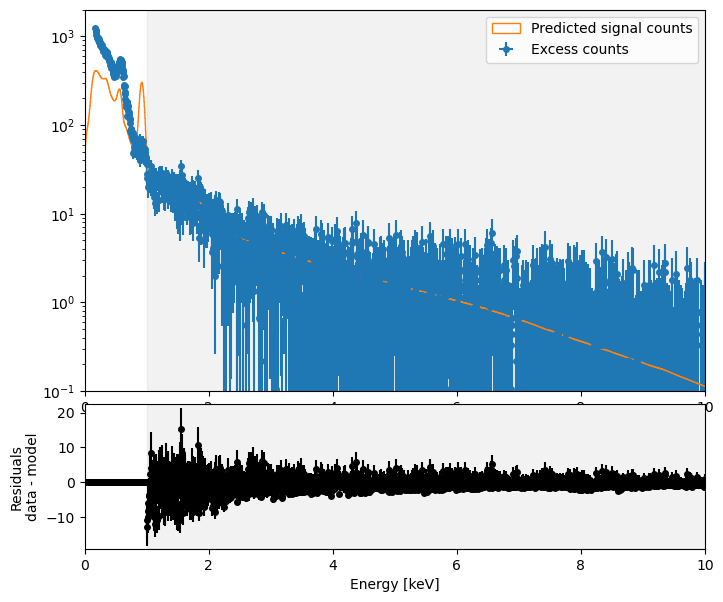

In [28]:
ax_spectrum, ax_residuals = pn_dataset.plot_fit()
mask = pn_dataset.mask
ax_spectrum.set_xlim(0, 10)
ax_residuals.set_xlim(0, 10)
ax_spectrum.set_ylim(1e-1, 2e3)
mask.plot_mask(ax=ax_spectrum)
mask.plot_mask(ax=ax_residuals)

<AxesSubplot: xlabel='Energy [keV]', ylabel='Residuals\ndata - model'>

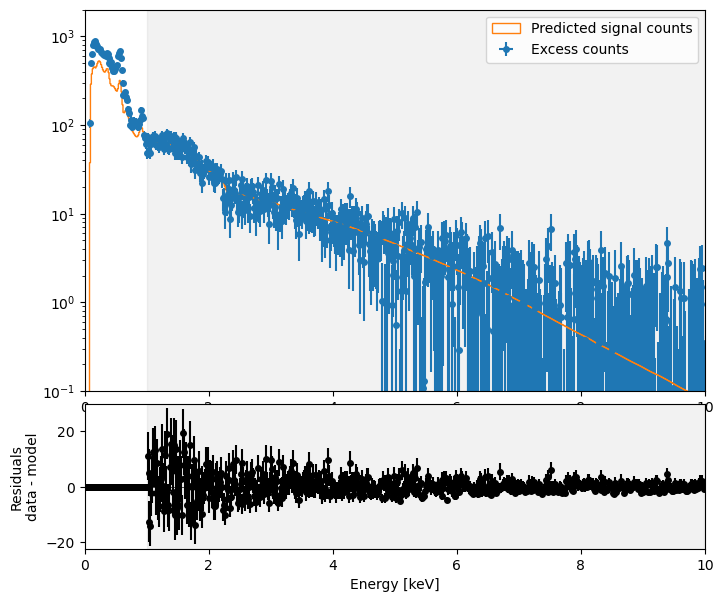

In [29]:
ax_spectrum, ax_residuals = mos1_dataset.plot_fit()
mask = mos1_dataset.mask
ax_spectrum.set_xlim(0, 10)
ax_residuals.set_xlim(0, 10)
ax_spectrum.set_ylim(1e-1, 2e3)
mask.plot_mask(ax=ax_spectrum)
mask.plot_mask(ax=ax_residuals)

<AxesSubplot: xlabel='Energy [keV]', ylabel='Residuals\ndata - model'>

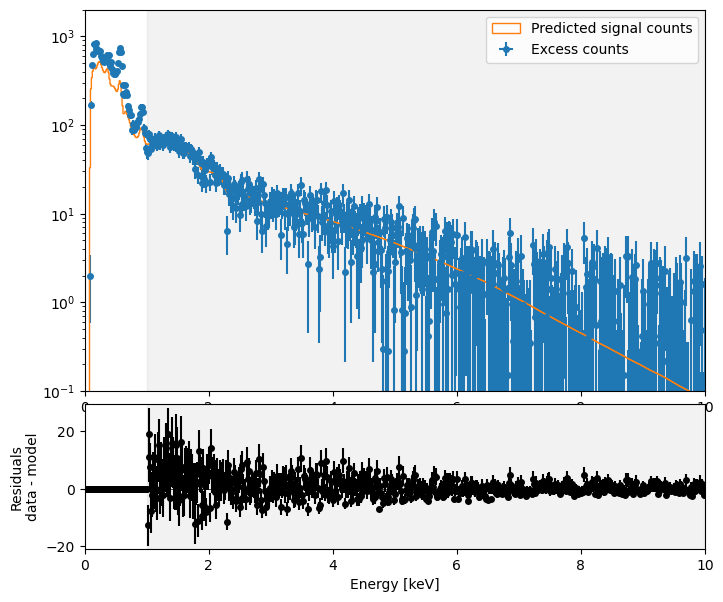

In [30]:
ax_spectrum, ax_residuals = mos2_dataset.plot_fit()
mask = mos2_dataset.mask
ax_spectrum.set_xlim(0, 10)
ax_residuals.set_xlim(0, 10)
ax_spectrum.set_ylim(1e-1, 2e3)

mask.plot_mask(ax=ax_spectrum)
mask.plot_mask(ax=ax_residuals)

### Fit

Run the binned joint-likelihood fit:

In [31]:
%%time
fit = Fit()
result_gammapy = fit.run(xmm_datasets)

CPU times: user 5.63 s, sys: 3.47 ms, total: 5.64 s
Wall time: 5.64 s


/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)


Inspect the fit output:

In [32]:
print(result_gammapy)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 54
	total stat : 3402.29

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [33]:
result_gammapy.parameters.to_table().pprint_all()

  type     name     value    unit   error      min        max    frozen is_norm link
-------- -------- ---------- ---- --------- ---------- --------- ------ ------- ----
spectral PhoIndex 2.0001e+00      6.645e-02  1.000e+00 3.000e+00  False   False     
spectral     norm 3.4122e-04      2.766e-05  1.000e-05 1.000e-03  False    True     
spectral       nH 6.3923e-01      7.477e-02  1.000e-01 2.000e+00  False   False     
spectral       nH 5.0000e-02      0.000e+00  0.000e+00 1.000e+06   True   False     
spectral    LineE 7.2000e-01      0.000e+00  0.000e+00 1.000e+06   True   False     
spectral    Sigma 3.3784e-14      0.000e+00  0.000e+00 2.000e+01   True   False     
spectral     norm 2.7727e-05      0.000e+00  0.000e+00 1.000e+24   True    True     
spectral       kT 1.4004e-01      0.000e+00  8.080e-02 6.845e+01   True   False     
spectral       He 9.9996e-01      0.000e+00  0.000e+00 1.000e+03   True   False     
spectral        C 2.4075e+00      0.000e+00  0.000e+00 1.000e+03 

<AxesSubplot: xlabel='Energy [keV]', ylabel='Residuals\ndata - model'>

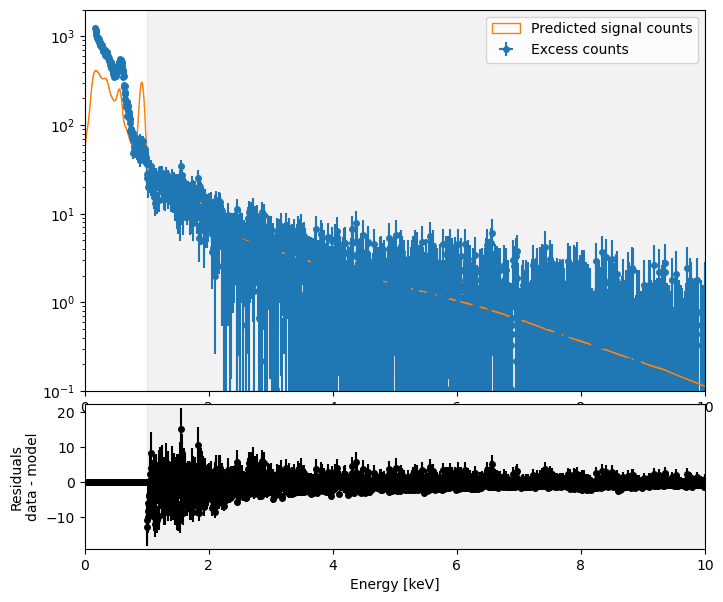

In [34]:
ax_spectrum, ax_residuals = pn_dataset.plot_fit()
mask = pn_dataset.mask
ax_spectrum.set_xlim(0, 10)
ax_residuals.set_xlim(0, 10)
ax_spectrum.set_ylim(1e-1, 2e3)
mask.plot_mask(ax=ax_spectrum)
mask.plot_mask(ax=ax_residuals)

<AxesSubplot: xlabel='Energy [keV]', ylabel='Residuals\ndata - model'>

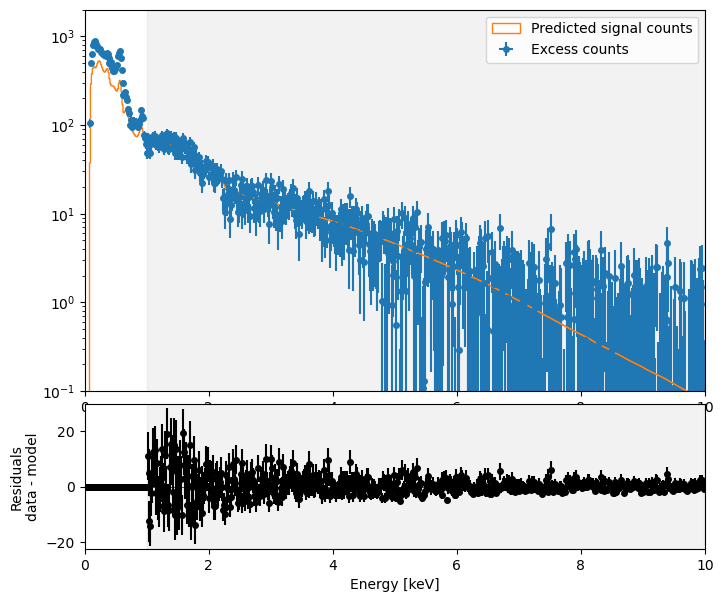

In [35]:
ax_spectrum, ax_residuals = mos1_dataset.plot_fit()
mask = mos1_dataset.mask
ax_spectrum.set_xlim(0, 10)
ax_residuals.set_xlim(0, 10)
ax_spectrum.set_ylim(1e-1, 2e3)
mask.plot_mask(ax=ax_spectrum)
mask.plot_mask(ax=ax_residuals)

<AxesSubplot: xlabel='Energy [keV]', ylabel='Residuals\ndata - model'>

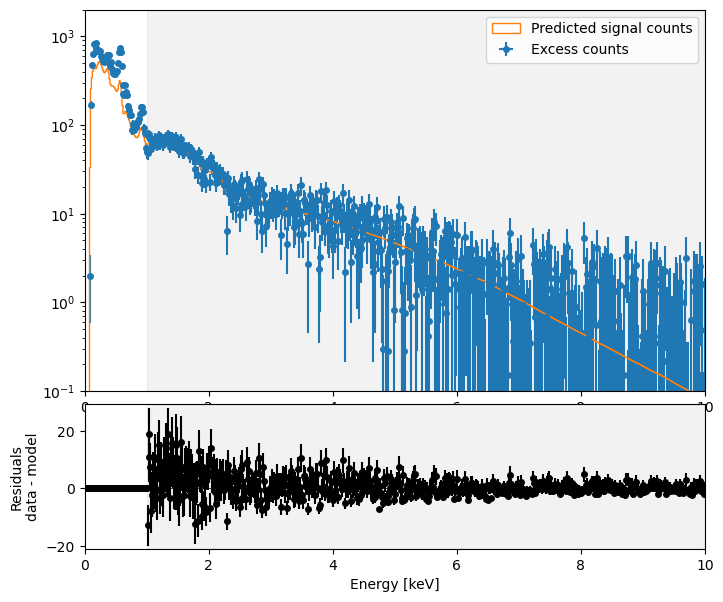

In [36]:
ax_spectrum, ax_residuals = mos2_dataset.plot_fit()
mask = mos2_dataset.mask
ax_spectrum.set_xlim(0, 10)
ax_residuals.set_xlim(0, 10)
ax_spectrum.set_ylim(1e-1, 2e3)
mask.plot_mask(ax=ax_spectrum)
mask.plot_mask(ax=ax_residuals)

### Compare sherpa vs. GammapyXray

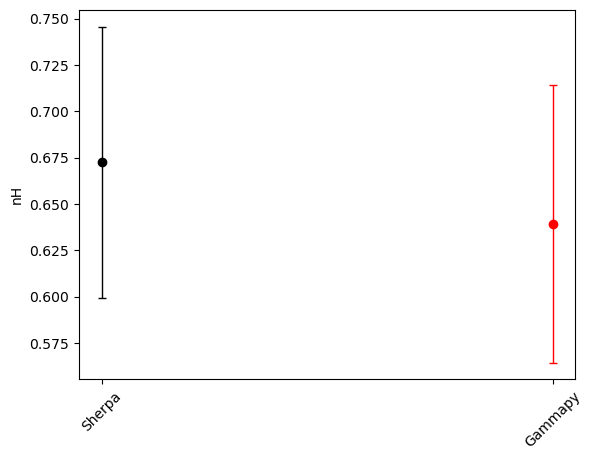

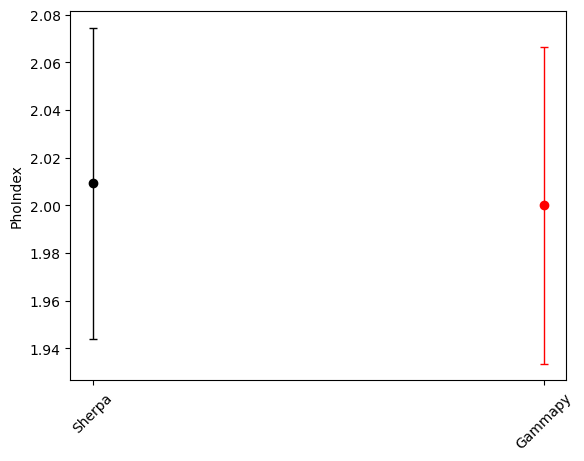

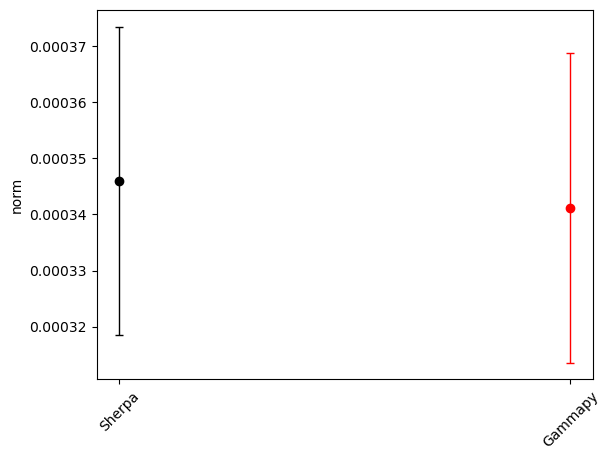

In [37]:
parnames = result_sherpa.parnames

for idx, name in enumerate(parnames):
    # Sherpa
    value_sherpa = result_sherpa.parvals[idx]
    error_sherpa = np.sqrt(result_sherpa.covar[idx][idx])

    # Gammapy
    idx_dot = name.find('.')
    name_gammapy = name[idx_dot+1:]
    par_gammapy = result_gammapy.parameters[name_gammapy]
    value_gammapy = par_gammapy.value
    error_gammapy = par_gammapy.error
    
    plt.errorbar(
        x=0,
        y=value_sherpa,
        yerr=error_sherpa,
        color="k",
        capsize=3,
        lw=1,
        marker="o"
    )
    plt.errorbar(
        x=1,
        y=value_gammapy,
        yerr=error_gammapy,
        color="r",
        capsize=3,
        lw=1,
        marker="o"
    )
    plt.xticks([0, 1], ["Sherpa", "Gammapy"], rotation=45)
    plt.ylabel(name_gammapy)
    plt.show()
    plt.close()

/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/astropy/units/quantity.py:502: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  value = np.array(value, dtype=dtype, copy=copy, order=order,


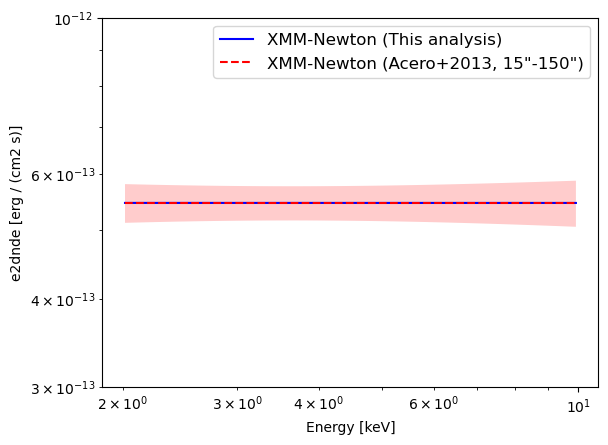

In [38]:
sed_type = "e2dnde"

xmm_pl = result_gammapy.models[0].spectral_model.model1 
xmm_pl = PowerLawSpectralModel(
    index=xmm_pl.PhoIndex.value, amplitude=xmm_pl.norm.value * u.cm**-2 * u.s**-1 * u.keV**-1, reference=1*u.keV
)

xmm_pl.plot(energy_bounds=[2*u.keV, 10*u.keV], color='b', sed_type=sed_type, label='XMM-Newton (This analysis)')

xmm_pl = PowerLaw2SpectralModel(emin=2*u.keV, emax=10*u.keV)

xmm_pl.amplitude.value = 1.365e-4
xmm_pl.amplitude.unit = u.cm**-2 * u.s**-1 
xmm_pl.index.err = 2.03

xmm_pl.amplitude.error = 7.6e-6
xmm_pl.index.error = 0.05

xmm_pl.energy_flux_error(energy_min=2*u.keV, energy_max=10*u.keV).to("erg cm-2s-1")
xmm_pl.plot(energy_bounds=[2*u.keV, 10*u.keV], color='r', ls="--", sed_type=sed_type, label='XMM-Newton (Acero+2013, 15"-150")')
xmm_pl.plot_error(energy_bounds=[2*u.keV, 10*u.keV], facecolor='r', sed_type=sed_type)

plt.ylim(3e-13,1e-12)
plt.legend(fontsize=12)

# Part 2

Replace the simple x-ray model with an absorbed synchrotron model

### Electron BROKEN ECPL

In [39]:
dataset_fr = Datasets.read("../../FINAL_FR", "../../FINAL_FR_MODELS")

In [40]:
# Compute the scaling factor
from regions import CircleAnnulusSkyRegion

skydir = SkyCoord.from_name("PSR J0855-4644").galactic
xmm_region = CircleAnnulusSkyRegion(skydir, 15*u.arcsec, 150*u.arcsec)

dataset_dummy = dataset_fr[0].copy().cutout(skydir, (1, 1)*u.deg)
dataset_dummy.exposure.data = np.ones_like(dataset_dummy.exposure.data)
dataset_dummy.models = [dataset_fr.models[-1]]

xmm_region_mask = dataset_dummy._geom.to_image().region_mask(regions=[xmm_region], inside=True)
npred_E = dataset_dummy.npred_signal(model_name="E").sum_over_axes().slice_by_idx({"energy":0})
npred_E_ON = npred_E * xmm_region_mask
npred_E = npred_E.upsample(4).data.sum()
npred_E_ON = npred_E_ON.upsample(4).data.sum()

factor = npred_E_ON / npred_E
factor

0.050579993267323084

In [41]:
from naima.models import ExponentialCutoffBrokenPowerLaw
from naima.model_utils import memoize
class CooledExponentialCutoffBrokenPowerLaw():
    """
    """

    param_names = [
        "amplitude",
        "e_0",
        "e_break",
        "alpha_1",
        "e_cutoff",
        "beta",
    ]
    _memoize = False
    _cache = {}
    _queue = []

    def __init__(
        self, B, amplitude, e_0, e_break, alpha_1, e_cutoff, beta=1.0
    ):
        self.amplitude = amplitude
        self.e_0 = e_0
        self.e_break = e_break
        self.alpha_1 = alpha_1
        self.e_cutoff = e_cutoff
        self.beta = beta
        
    @property
    def model(self):
        return ExponentialCutoffBrokenPowerLaw(
                    self.amplitude,
                    self.e_0,
                    self.e_break,
                    self.alpha_1,
                    self.alpha_1 + 1,
                    self.e_cutoff,
                    self.beta,
                )

    @staticmethod
    def eval(e, amplitude, e_0, e_break, alpha_1, alpha_2, e_cutoff, beta):
        """One dimensional broken power law model function"""
        return self.model.eval(e, amplitude, e_0, e_break, alpha_1, alpha_2, e_cutoff, beta)

    @memoize
    def _calc(self, e):
        return self.model.eval(e)

    def __call__(self, e):
        """One dimensional broken power law model with exponential cutoff
        function"""
        return self.model._calc(e)

In [42]:
class RescaledCooledExponentialCutoffBrokenPowerLaw():
    """
    """

    param_names = [
        "factor",
        "amplitude",
        "e_0",
        "e_break",
        "alpha_1",
        "e_cutoff",
        "beta",
    ]
    _memoize = False
    _cache = {}
    _queue = []

    def __init__(
        self, factor, amplitude, e_0, e_break, alpha_1, e_cutoff, beta=1.0
    ):
        self.factor = factor
        self.amplitude = amplitude
        self.e_0 = e_0
        self.e_break = e_break
        self.alpha_1 = alpha_1
        self.e_cutoff = e_cutoff
        self.beta = beta
        
    @property
    def model(self):
        return ExponentialCutoffBrokenPowerLaw(
                    self.amplitude * self.factor,
                    self.e_0,
                    self.e_break,
                    self.alpha_1,
                    self.alpha_1 + 1,
                    self.e_cutoff,
                    self.beta,
                )

    @staticmethod
    def eval(e, amplitude, e_0, e_break, alpha_1, alpha_2, e_cutoff, beta):
        """One dimensional broken power law model function"""
        return self.model.eval(e, amplitude, e_0, e_break, alpha_1, alpha_2, e_cutoff, beta)

    @memoize
    def _calc(self, e):
        return self.model.eval(e)

    def __call__(self, e):
        """One dimensional broken power law model with exponential cutoff
        function"""
        return self.model._calc(e)

In [43]:
T = 10 * u.kyr 
distance = 0.9 * u.kpc
B = 6 * u.uG

nEed = 40

def Ebreak(T, B):
    #https://arxiv.org/pdf/2201.05567.pdf
    T_400 = T / (400 * u.yr)
    B_100 = B / (100 * u.uG)
    break_en = (3.1 * u.TeV) * T_400 **-1 * B_100**-2 
    return break_en.to("TeV")
   
amplitude = 5e31 / u.eV 
index1 = 1.5
e_cutoff= 400 * u.TeV

e_break = Ebreak(T, B)
particle_distribution_TeV = CooledExponentialCutoffBrokenPowerLaw(
    amplitude=amplitude, 
    e_0=1 * u.TeV,
    e_break=e_break,
    alpha_1=index1,
    e_cutoff=e_cutoff, 
    beta=1.0, 
)
particle_distribution_X = RescaledCooledExponentialCutoffBrokenPowerLaw(
    factor=factor,
    amplitude=amplitude, 
    e_0=1 * u.TeV,
    e_break=e_break,
    alpha_1=index1,
    e_cutoff=e_cutoff, 
    beta=1.0, 
)

ic = naima.radiative.InverseCompton(
    particle_distribution_TeV,
    seed_photon_fields=["CMB"],
    Eemin=10 * u.GeV,
    Eemax=1e3 * u.PeV,
    nEed=nEed
)
syn = naima.radiative.Synchrotron(
    particle_distribution_X,
    B=B,
    Eemin=10 * u.GeV,
    Eemax=1e3 * u.PeV,
    nEed=nEed
)

ic_model = NaimaSpectralModel(ic, distance=distance)
syn_model = NaimaSpectralModel(syn, distance=distance)

syn_model.amplitude = ic_model.amplitude
syn_model.e_0 = ic_model.e_0
syn_model.e_break = ic_model.e_break
syn_model.alpha_1 = ic_model.alpha_1
syn_model.e_cutoff = ic_model.e_cutoff
syn_model.beta = ic_model.beta

syn_model_absorbed = syn_model * absorption_source_gp

Verify that the model works:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


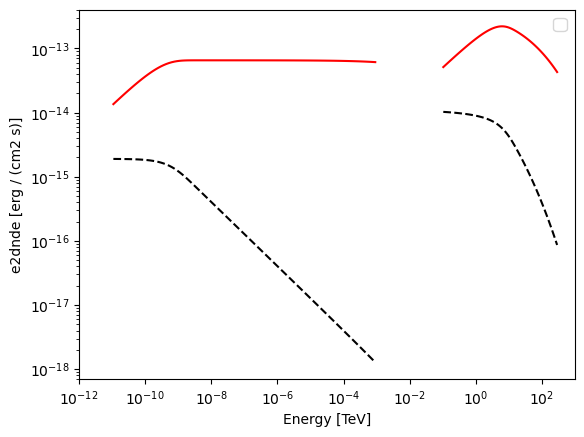

In [44]:
sed_type = "e2dnde"

ic_model.alpha_1.value = 2
ic_model.e_cutoff.value = 1e6

color="r"
ic_model.plot(energy_bounds=[0.1, 300]*u.TeV, sed_type=sed_type, color=color, ls="-")
syn_model.plot(energy_bounds=[0.01, 1e6]*u.keV, sed_type=sed_type, color=color, ls="-")

ic_model.alpha_1.value = 3
color="k"
ic_model.plot(energy_bounds=[0.1, 300]*u.TeV, sed_type=sed_type, color=color, ls="--")
syn_model.plot(energy_bounds=[0.01, 1e6]*u.keV, sed_type=sed_type, color=color, ls="--")

plt.xlim(1e-12, 1000)

plt.legend(fontsize=12)

In [45]:
ic_model.alpha_1.value = 1.5
ic_model.e_cutoff.value = 400 

Verify that the first-guess parameters are OK:

/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)


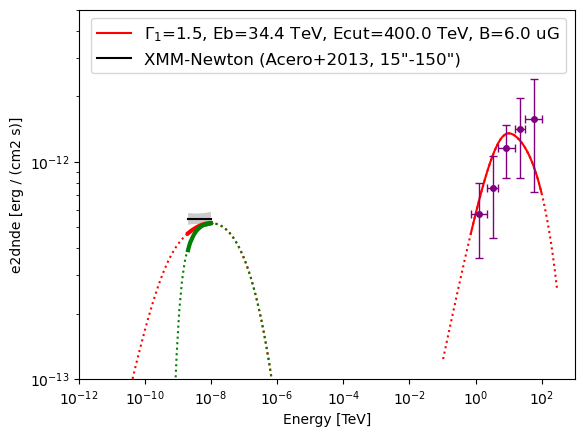

In [46]:
sed_type = "e2dnde"

color="r"
ic_model.plot(energy_bounds=[0.7, 100]*u.TeV, sed_type=sed_type, color=color, label=f"$\Gamma_1$={index1}, Eb={e_break:.1f}, Ecut={e_cutoff:.1f}, B={B}")
ic_model.plot(energy_bounds=[0.1, 300]*u.TeV, sed_type=sed_type, color=color, ls=":")
syn_model.plot(energy_bounds=[2, 10]*u.keV, sed_type=sed_type, color=color, lw=3)
syn_model.plot(energy_bounds=[0.01, 1e6]*u.keV, sed_type=sed_type, color=color, ls=":")
color="g"
syn_model_absorbed.plot(energy_bounds=[2, 10]*u.keV, sed_type=sed_type, color=color, lw=3)
syn_model_absorbed.plot(energy_bounds=[0.01, 1e6]*u.keV, sed_type=sed_type, color=color, ls=":")

fpoint = FluxPoints.read("../../fpoints_E_RT_fr.fits")
fpoints_opts = {"capsize":3, "lw":1}
sed_type = "e2dnde"
fpoint.plot(sed_type=sed_type, color="purple", **fpoints_opts)

xmm_pl.plot(energy_bounds=[2*u.keV, 10*u.keV], color='k', ls="-", sed_type=sed_type, label='XMM-Newton (Acero+2013, 15"-150")')
xmm_pl.plot_error(energy_bounds=[2*u.keV, 10*u.keV], facecolor='k', sed_type=sed_type)

plt.xlim(1e-12, 1000)
plt.ylim(1e-13, 5e-12)

plt.legend(fontsize=12)

### Load and prepare the TeV 3D dataset

In [47]:
dataset_fr = Datasets.read("../../FINAL_FR", "../../FINAL_FR_MODELS")[0]

In [48]:
for model in dataset_fr.models:
    model.freeze()

### Define joint datasets and assign models

In [49]:
dataset_fr.models[-1].spectral_model = ic_model

In [50]:
for model in dataset_fr.models:
    model.datasets_names = [dataset_fr.name]

In [51]:
mwl_datasets = Datasets(datasets=[dataset_fr, pn_dataset, mos1_dataset, mos2_dataset])

In [52]:
for dataset in mwl_datasets[1:]:
    dataset.models[0].spectral_model = syn_model_absorbed

In [53]:
syn_model_absorbed.model1.beta.frozen = True
syn_model_absorbed.model1.e_0.frozen = True
syn_model_absorbed.model1.e_cutoff.frozen = True
syn_model_absorbed.model1.B.frozen = True
syn_model_absorbed.model1.e_break.frozen = True
syn_model_absorbed.model1.factor.frozen = True

# The absorption column density has been estimated with good accuracy in Part 1, so we freeze it here
syn_model_absorbed.model2.nH.frozen = True

In [54]:
print(mwl_datasets.models)

DatasetModels

Component 0: FoVBackgroundModel

  Name                      : nuE7Bkck-bkg
  Datasets names            : ['nuE7Bkck']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                  (frozen):      0.999                   
    tilt                  (frozen):      0.000                   
    reference             (frozen):      1.000       TeV         

Component 1: SkyModel

  Name                      : A
  Datasets names            : ['nuE7Bkck']
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : TemplateSpatialModel
  Temporal model type       : 
  Parameters:
    index@U7LSKXLu        (frozen):      1.892                   
    amplitude             (frozen):   8.43e-12       1 / (cm2 s TeV)
    reference             (frozen):      1.000       TeV         
    lambda_@Mpy4rHgf      (frozen):      0.141       1 / TeV     
    alpha                 (frozen):      1.000                   

Componen

In [55]:
mwl_datasets.parameters.free_parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str4,int64,float64,float64,bool,bool,str18
spectral,amplitude,5.0000e+31,eV-1,0.000e+00,nan,nan,False,True,amplitude@NguhuggK
spectral,alpha_1,1.5000e+00,,0.000e+00,nan,nan,False,False,alpha_1@7PQvzemD


### Fit

In [56]:
for dataset in mwl_datasets[1:]:
    dataset.grouped.evaluators["source"]._cached_parameter_values_previous = None

In [57]:
%%time
fit = Fit()
fit_result = fit.run(mwl_datasets)

/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() requires pars,lo,hi arguments, sent 2 arguments
  warnings.warn(emsg, FutureWarning)
/home/lucagiunti/miniconda3/envs/GammapyXray/lib/python3.8/site-packages/sherpa/astro/xspec/__init__.py:1179: FutureWarning: calc() 

CPU times: user 3min 6s, sys: 12.5 s, total: 3min 18s
Wall time: 3min 18s


Inspect the fit output:

In [58]:
print(fit_result)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 116
	total stat : 515773.33

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [60]:
fit_result.parameters.free_parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str4,float64,float64,float64,bool,bool,str18
spectral,amplitude,1.0547e+32,eV-1,1.716e+31,nan,nan,False,True,amplitude@NguhuggK
spectral,alpha_1,1.6329e+00,,3.666e-02,nan,nan,False,False,alpha_1@7PQvzemD
spectral,amplitude,1.0547e+32,eV-1,1.716e+31,nan,nan,False,True,amplitude@NguhuggK
spectral,alpha_1,1.6329e+00,,3.666e-02,nan,nan,False,False,alpha_1@7PQvzemD


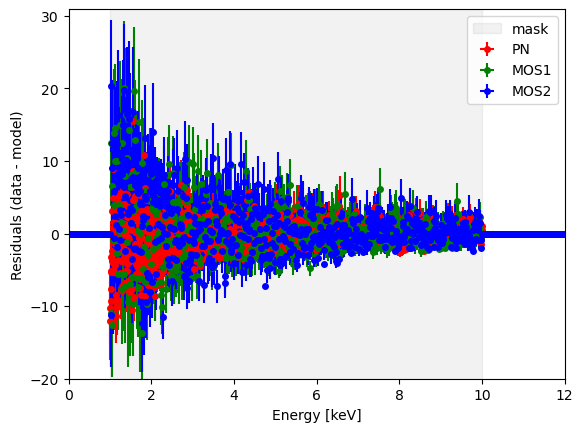

In [63]:
pn_dataset.plot_residuals_spectral(color="r", label="PN")
mos1_dataset.plot_residuals_spectral(color="g", label="MOS1")
mos2_dataset.plot_residuals_spectral(color="b", label="MOS2")
pn_dataset.mask.plot_mask()
plt.legend()

In [68]:
dataset_fr.models.parameters.free_parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str4,float64,float64,float64,bool,bool,str18
spectral,amplitude,1.0547e+32,eV-1,1.716e+31,nan,nan,False,True,amplitude@NguhuggK
spectral,alpha_1,1.6329e+00,,3.666e-02,nan,nan,False,False,alpha_1@7PQvzemD


In [72]:
from gammapy.estimators import FluxPointsEstimator
from gammapy.utils import pbar
pbar.SHOW_PROGRESS_BAR = True

e_min, e_max = 0.7, 100
energy_edges = np.logspace(np.log10(e_min), np.log10(e_max), 6) * u.TeV

fpe = FluxPointsEstimator(
    energy_edges=energy_edges, source="E", reoptimize=False, n_sigma_ul=3, selection_optional=["ul"]
)
flux_points_E = fpe.run(datasets=[dataset_fr])
flux_points_E.to_table(sed_type="dnde", formatted=True)

e_ref,e_min,e_max,dnde,dnde_err,dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success
TeV,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool
1.288,0.730,2.272,1.942e-13,7.988e-14,4.422e-13,6.275,2.505,129340.83996724714,104.44633,290756.962,False,128712.0,True
3.317,2.272,4.843,5.432e-14,1.723e-14,1.090e-13,11.347,3.369,27403.303623009637,75.24525,127560.025,False,28208.0,True
8.544,4.843,15.073,8.706e-15,2.515e-15,1.687e-14,14.988,3.871,11218.961763089004,57.954964,77532.423,False,11077.0,True
22.007,15.073,32.131,1.793e-15,6.419e-16,4.063e-15,12.291,3.506,1218.4045504345556,19.789082,12600.198,False,1162.0,True
56.684,32.131,100.000,2.465e-16,1.214e-16,7.294e-16,8.054,2.838,279.16035673547333,7.6006994,3906.382,False,286.0,True


Compare the fit result with Part 1:

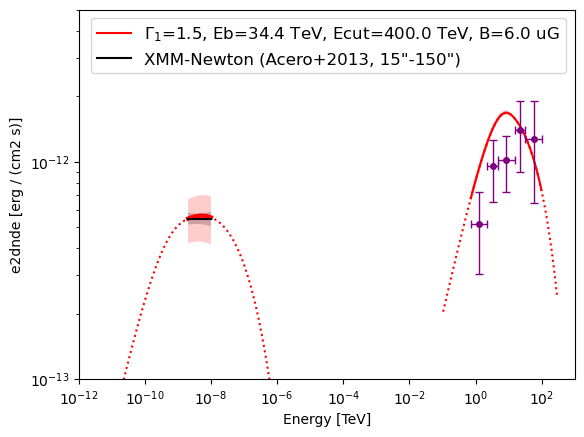

In [76]:
sed_type = "e2dnde"

color="r"
ic_model.plot(energy_bounds=[0.7, 100]*u.TeV, sed_type=sed_type, color=color, label=f"$\Gamma_1$={index1}, Eb={e_break:.1f}, Ecut={e_cutoff:.1f}, B={B}")
ic_model.plot_error(energy_bounds=[0.7, 100]*u.TeV, sed_type=sed_type, facecolor=color)
ic_model.plot(energy_bounds=[0.1, 300]*u.TeV, sed_type=sed_type, color=color, ls=":")
syn_model.plot(energy_bounds=[2, 10]*u.keV, sed_type=sed_type, color=color, lw=3)
syn_model.plot(energy_bounds=[0.01, 1e6]*u.keV, sed_type=sed_type, color=color, ls=":")
syn_model.plot_error(energy_bounds=[2, 10]*u.keV, sed_type=sed_type, facecolor=color)

fpoints_opts = {"capsize":3, "lw":1}
sed_type = "e2dnde"
flux_points_E.plot(sed_type=sed_type, color="purple", **fpoints_opts)

xmm_pl.plot(energy_bounds=[2*u.keV, 10*u.keV], color='k', ls="-", sed_type=sed_type, label='XMM-Newton (Acero+2013, 15"-150")')
xmm_pl.plot_error(energy_bounds=[2*u.keV, 10*u.keV], facecolor='k', sed_type=sed_type)

plt.xlim(1e-12, 1000)
plt.ylim(1e-13, 5e-12)

plt.legend(fontsize=12)